In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from scipy.sparse.linalg import svds

In [8]:
labels = np.array(pd.read_hdf("digits.hdf", key="/labels"))
n = labels.shape[0]
images = pd.read_hdf("digits.hdf", key="/images").values.reshape(n, 8, 8)

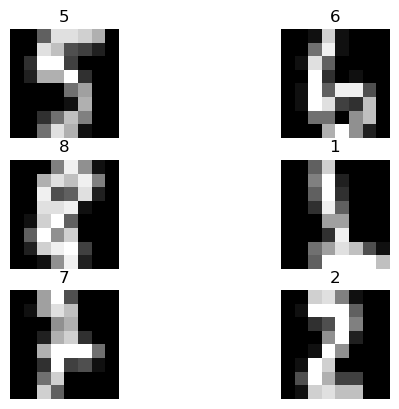

In [11]:
np.random.seed(2_87 + 3_62)
k = 6
indices = np.random.randint(0, n, k)

fig = plt.figure()
for i in range(k):
    fig.add_subplot(3, 2, i + 1)
    plt.imshow(images[indices[i]], cmap="gray")
    plt.axis("off")
    plt.title(str(labels[indices[i]]))
plt.show()

In [23]:
normalized = Normalizer().fit_transform(images.reshape(n, 64))

u, s, vt = svds(normalized, k=2)
projected = u @ np.diag(s)

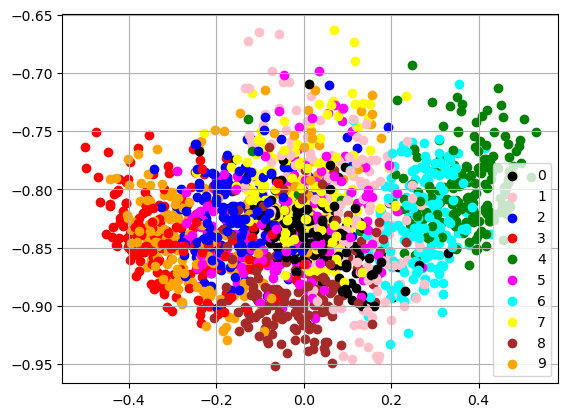

In [28]:
colours = ['black', 'pink', 'blue', 'red', 'green', 'magenta', 'cyan', 'yellow', 'brown', 'orange']
for i in range(10):
    plt.scatter(
        projected[i, 0],
        projected[i, 1],
        c = colours[labels[i]],
        label = labels[i]
    )
for i in range(10, n):
    plt.scatter(
        projected[i, 0],
        projected[i, 1],
        c = colours[labels[i]]
    )
plt.legend(loc='best')
plt.grid()
plt.show()